<a href="https://colab.research.google.com/github/Boram-Git/kaggle-titanic/blob/master/titanic_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# jupyternotebook 화면 넓게
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [16]:
# 경고제어
import warnings
warnings.filterwarnings(action='ignore')

In [17]:
# plot title 한글 깨짐 오류 해결
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# Titanic: Machine Learning from Disaster
## Predict survival on the Titanic
1. 문제설명정의  
2. 데이터수집
3. 탐색적 데이터 분석
4. 기능 엔지니어링 
5. 모델링
6. 테스트

### 1. 문제설명정의

어떤 종류의 사람들이 생존할 가능성이 있는지에 대한 분석하기.  
특히 기계 학습 도구를 적용하여 타이타닉호의 비극에서 살아남은 승객을 예측하기.

In [18]:
# 이미지 삽입
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

### 2. 데이터수집

train.csv 및 test.csv 데이터는 Kaggle에서 제공하며 다운로드할 수 있다.

In [19]:
import pandas as pd
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 3. 탐색적 데이터 분석

In [21]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### 데이터 내역
Survived: 0 = No, 1 = Yes  
pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd  
sibsp: # of siblings / spouses aboard the Titanic  
parch: # of parents / children aboard the Titanic  
ticket: Ticket number  
cabin: Cabin number  
embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### 총 행 및 열  
학습 데이터 세트에 891개의 행과 12개의 열  
테스트 데이터 세트에 418개의 행과 11개의 열

In [23]:
train_df.shape

(891, 12)

In [24]:
test_df.shape

(418, 11)

In [25]:
train_df.info()
print('-' *100)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtyp

### 데이터 형태
**int** -> PassengerId, Survived, Pclas, SibSp, Parch  
**float** -> Age, Fare    
**object** -> Name, Sex, Ticket, Cabin, Embarked  

In [26]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 결측치  확인
train_df['Age'] -> **177**  
train_df['Cabin'] -> **687**    
train_df['Embarked'] -> **2**  
test_df['Age'] -> **86**  
test_df['Cabin'] -> **327**

### 시각화를 위해 Python 라이브러리 가져오기

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### 범주형 기능에 대한 막대 차트
Pclass  
Sex  
SibSp ( # of siblings and spouse)  
Parch ( # of parents and children)  
Embarked  
Cabin  

In [29]:
def bar_chart(feature):
    Survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([Survived, dead])
    df.index = ['Survived', 'dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

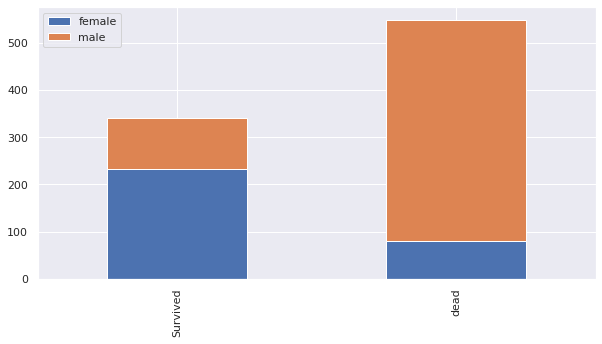

In [30]:
bar_chart('Sex')

### 성별 : 생존여부
- 생존측면: 여성이 남성보다 2배 더 많이 생존함.
- 사망측면: 남성이 여성보다 5배 더 많이 사망함. 

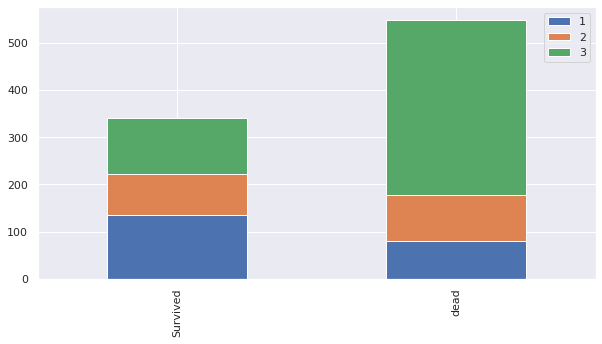

In [31]:
bar_chart('Pclass')

### 객실등급 : 생존여부
- 생존측면: 1등급 > 3등급 > 2등급 순으로 생존함.
- 사망측면: 3등급 > 2등급 > 1등급 순으로 사망함.

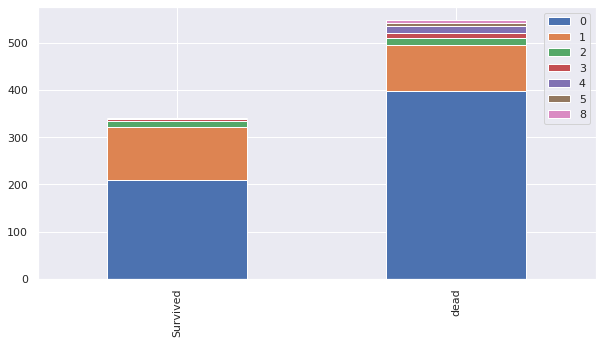

In [32]:
bar_chart('SibSp')

### 형제자매배우자동반 : 생존여부
- 생존측면: 0명 > 1명 > 2명 순으로 생존함.
- 사망측면: 0명 > 1명 > 2명 순으로 사망함, 형제자매나 배우자 없이 탑승한 사람이 사망할 가능성이 높다.

(?)차트는 2명 이상의 형제자매 또는 배우자와 함께 탑승한 사람이 생존 가능성이 더 높다는 것을 확인합니다.

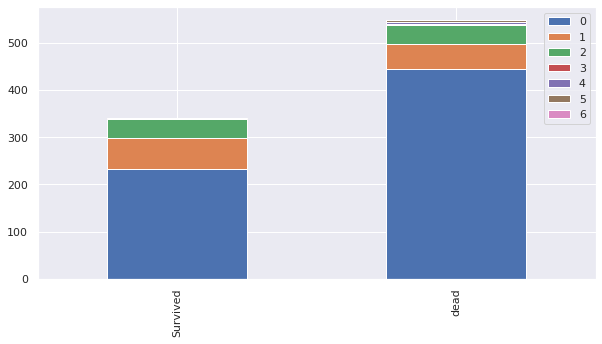

In [33]:
bar_chart('Parch')

### 부모자녀동반 : 생존여부
- 생존측면: 0명 > 1명 > 2명 순으로 생존함.
- 사망측면: 0명 > 1명 > 2명 순으로 사망함, 혼자 탑승한 사람이 사망할 가능성이 높다.

(?)차트는 2명 이상의 부모 또는 생존 가능성이 높은 자녀와 함께 탑승한 사람을 확인합니다.

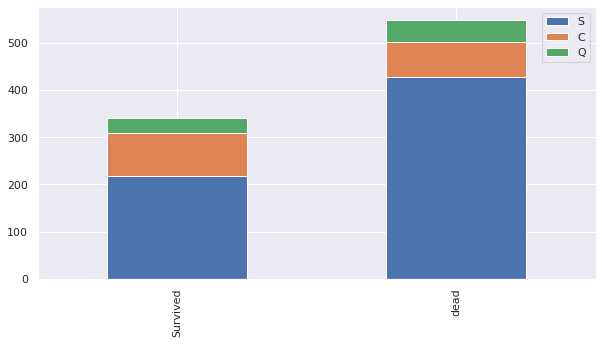

In [34]:
bar_chart('Embarked')

### 탑승위치 : 생존여부
- 생존측면: S > C > Q 순으로 생존함.
- 사망측명: S > C > Q 순으로 사망함.

차트는 C에서 탑승한 사람이 생존했을 가능성이 약간 더 높다는 것을 확인합니다.  
차트는 Q에 탑승한 사람이 사망할 가능성이 더 높다는 것을 확인합니다.  
차트는 S에 탑승한 사람이 사망했을 가능성이 더 높다는 것을 확인합니다.

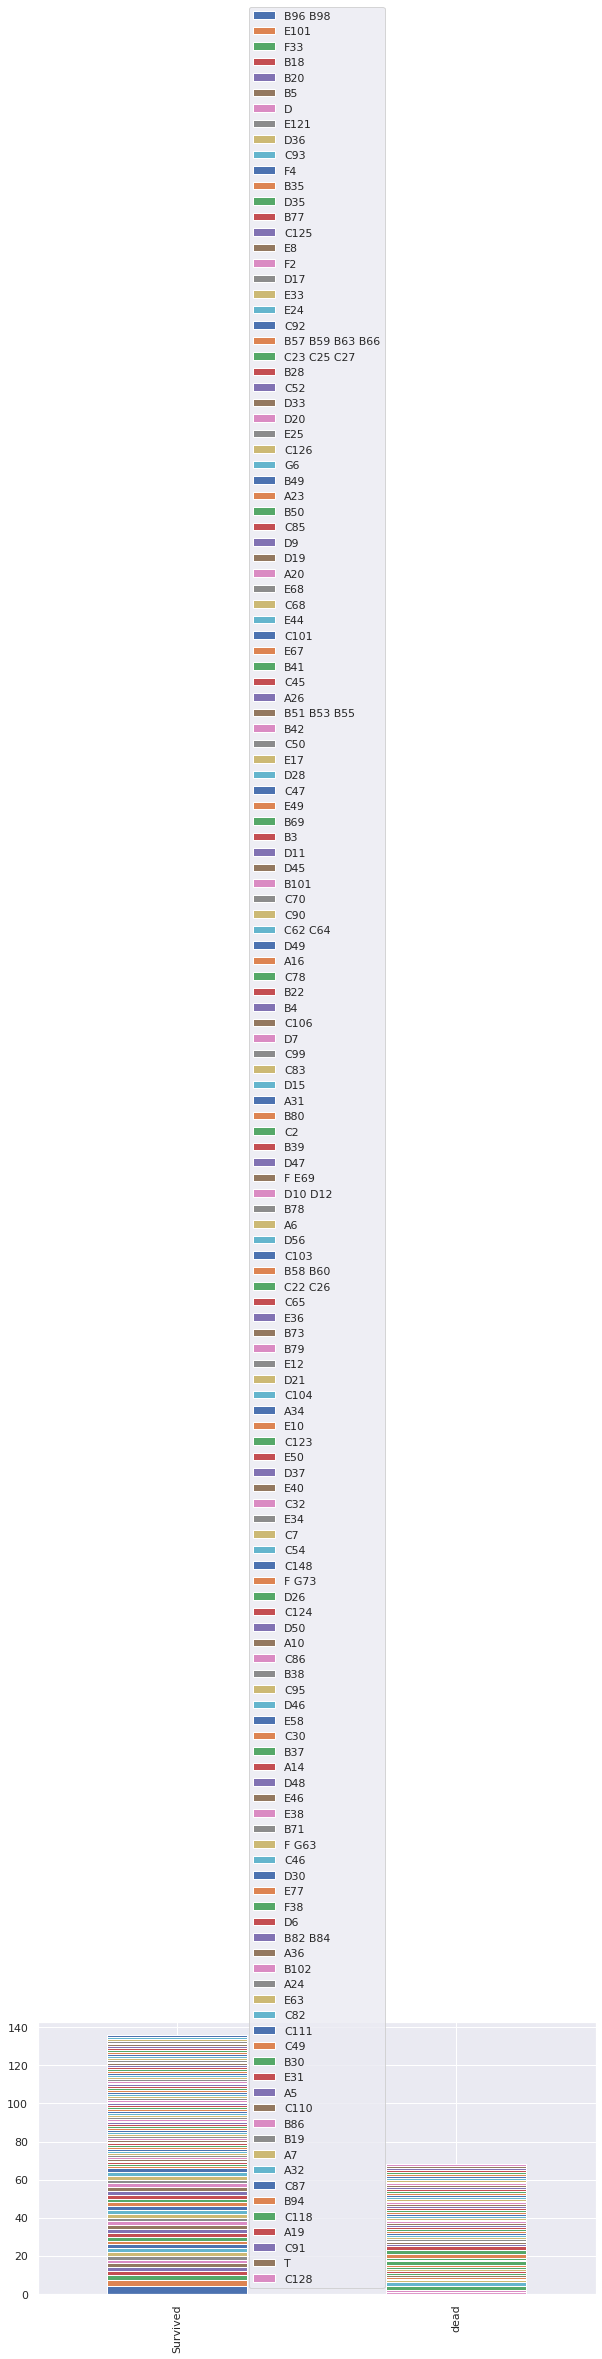

In [35]:
bar_chart('Cabin')

### 객실번호 : 생존여부
차트 의미없는듯

### 4. 기능 엔지니어링

기능 엔지니어링은 데이터의 도메인 지식을 사용하는 프로세스입니다.  
기계 학습 알고리즘을 작동시키는 기능(기능 벡터)을 생성합니다.  

특징 벡터는 일부 개체를 나타내는 숫자 특징의 n차원 벡터입니다.  
기계 학습의 많은 알고리즘은 객체의 수치적 표현을 필요로 합니다.  
이러한 표현은 처리 및 통계 분석을 용이하게 하기 때문입니다.

In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 4.1 타이타닉은 어떻게 침몰했는가?

In [38]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

### 4.2 이름

In [39]:
combine = [train_df, test_df] # combining train and test dataset

for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False) # 정규식 

In [40]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [41]:
train_df['Title'].value_counts() # 열의 각 값(value)에 대한 모든 발생 횟수를 반환합니다.

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [42]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

### Name map
**'Mrs'** : 0
**'Miss'** : 1
**'Master'** : 2
**'Rare'** : 3
**'Mr'** : 4

In [43]:
Name_mapping={'Mrs' : 0, 'Miss' : 1, 'Master' : 2, 'Rare' : 3, 'Mr' : 4}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(Name_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [44]:
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,4.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,4.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,4.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,4.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,4.0


In [45]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,4.0


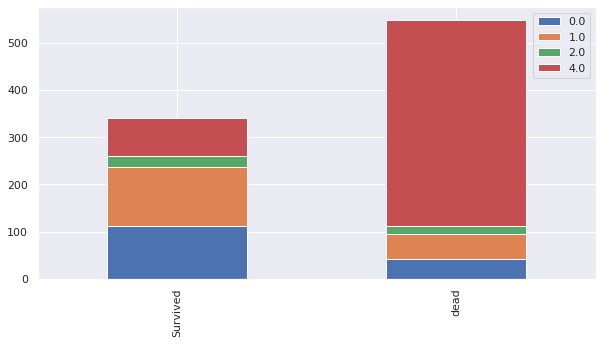

In [46]:
bar_chart('Title')

In [47]:
train_df[['Title', 'Survived']].groupby('Title', as_index=False).mean().sort_values(by='Survived', ascending=False)
# train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() -> 위와 같은 코드인데 좀 더 간단함

,Title,Survived
0,0.0,0.730263
1,1.0,0.697802
2,2.0,0.575000
3,4.0,0.156673


### Title : 생존여부
'Mrs' : 0 'Miss' : 1 'Master' : 2 'Rare' : 3 'Mr' : 4  
- 생존측면: Miss > Mrs > Mr 순으로 생존함.
- 사망측면: Mr이 가장 많이 사망함.

In [48]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,4.0


### 4.3 성별
'male' : 0, 'female' : 1

In [49]:
Sex_mapping={'male' : 0, 'female' : 1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(Sex_mapping)
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name  Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    0  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
 2                               Heikkinen, Miss. Laina    1  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
 4                             Allen, Mr. William Henry    0  35.0      0   
 ..                                                 ...  ...   ...  

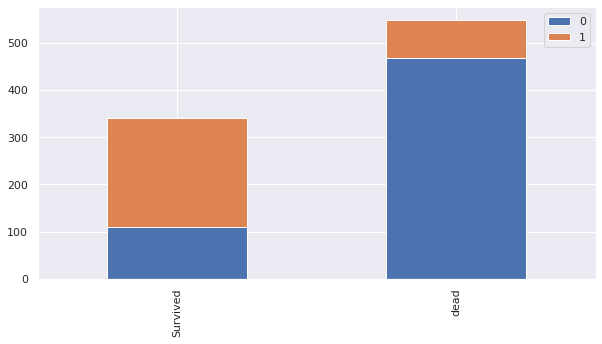

In [50]:
bar_chart('Sex')

### 4.4 나이

### 4.4.1 일부 연령 누락
누락된 연령에 대해 Title의 평균 연령을 사용합시다.

In [51]:
# 누락된 연령을 각 타이틀의 중간 연령으로 채우십시오 (Mr, Mrs, Miss, Others, Master) -> 과학적으로 접근하려면 각각 성별/신분에 맞게 나이 설정
for dataset in combine:
    dataset['Age'].fillna(train_df.groupby('Title')['Age'].transform('median'), inplace=True)
    dataset['Age'].fillna(test_df.groupby('Title')['Age'].transform('median'), inplace=True)
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name  Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    0  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
 2                               Heikkinen, Miss. Laina    1  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
 4                             Allen, Mr. William Henry    0  35.0      0   
 ..                                                 ...  ...   ...  

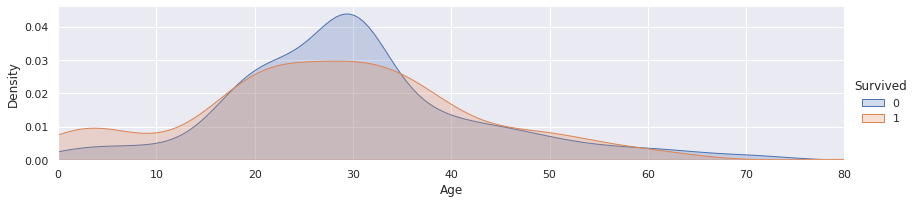

In [52]:
# facet(한 면, 아무 변수명)
# FacetGrid(패싯그리드)

# 생존여부 코드에 따라 색을 다르게 표시하는 것이 hue
# shade=True 눈금간격
# set함수 # matplotlib.pyplot 모듈의 xlim(), ylim(), axis() 함수를 사용하면 그래프의 X, Y축이 표시되는 범위를 지정할 수 있습니다.
# plt.xlim([0, 5])      # X축의 범위: [xmin, xmax]
# plt.ylim([0, 20])     # Y축의 범위: [ymin, ymax]
# col, row, hue - 범례 추가 -> facet.add_legend()

facet = sns.FacetGrid(train_df, hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age',shade=True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

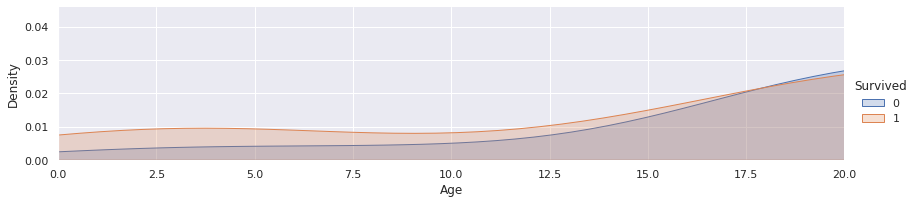

In [53]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age', shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.xlim(0, 20) # 0세에서 20세까지

(20.0, 30.0)

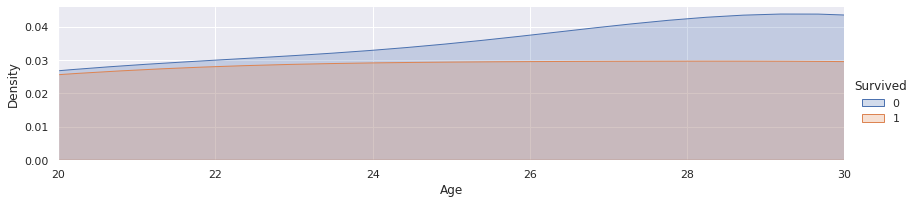

In [54]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age', shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.xlim(20, 30) # 20세에서 30세까지

(30.0, 40.0)

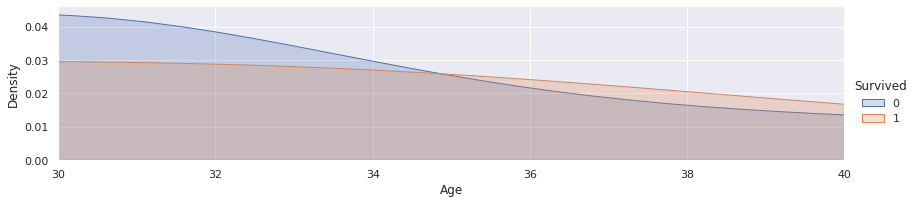

In [55]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age', shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.xlim(30, 40) # 30세에서 40세까지

(40.0, 60.0)

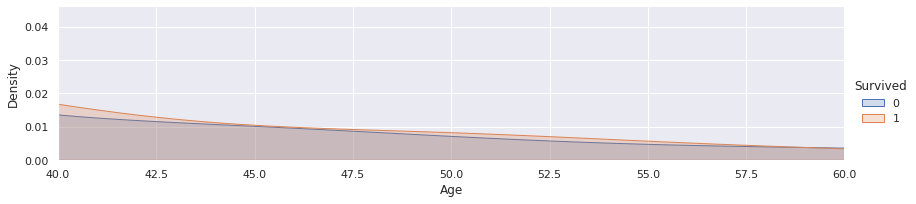

In [56]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age', shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.xlim(40, 60) # 40세에서 60세까지

(60.0, 80.0)

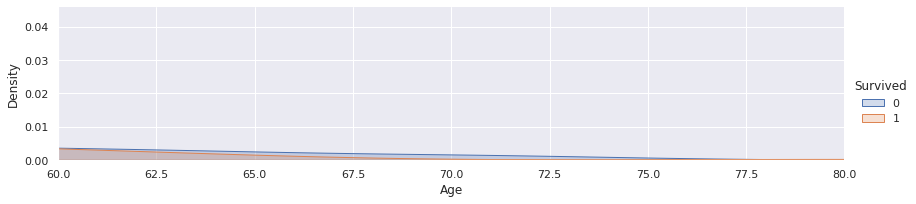

In [57]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age', shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.xlim(60, 80) # 60세에서 80세까지

In [58]:
train_df.info()
print('-' * 200)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 90.6+ KB
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<

### 4.4.2 Binning

숫자 연령을 범주형 변수로 구간화/변환  

특징 벡터 맵:  
feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4  

In [59]:
dataset['Age_cut'] = 0
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cut
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,4.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0.0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,4.0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,4.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.0,0,0,A.5. 3236,8.0500,NaN,S,4.0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,0.0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,4.0,0
416,1308,3,"Ware, Mr. Frederick",0,36.0,0,0,359309,8.0500,NaN,S,4.0,0


In [60]:
for dataset in combine:
    dataset['Age_cut'] = pd.cut(train_df.Age, bins=[0, 16, 32, 48, 64, 80], labels=[0, 1, 2, 3, 4])
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name  Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    0  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
 2                               Heikkinen, Miss. Laina    1  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
 4                             Allen, Mr. William Henry    0  35.0      0   
 ..                                                 ...  ...   ...  

In [61]:
train_df.Age_cut.value_counts().to_frame().style.background_gradient(cmap='summer')
# 테이블로 확인을 해보니 구간을 수치로 직접 지정해서 나눈 것보다 각 범주값의 갯수들이 비슷비슷해졌다. (완전 동일한 갯수로 나누어지지는 않음 주의)

,Age_cut
1,501
2,206
0,104
3,69
4,11


In [62]:
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cut
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,4.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0.0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,4.0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,4.0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.0,0,0,A.5. 3236,8.0500,NaN,S,4.0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,0.0,2
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,4.0,2
416,1308,3,"Ware, Mr. Frederick",0,36.0,0,0,359309,8.0500,NaN,S,4.0,2


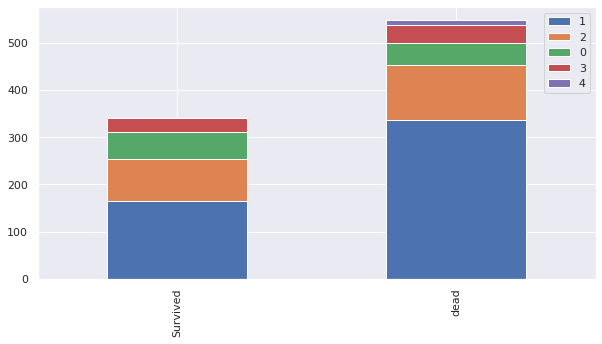

In [63]:
bar_chart('Age_cut')

숫자 연령을 범주형 변수로 구간화/변환

특징 벡터 맵:  
feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4  

- 생존측면: young > adult > child 순으로 생존함.  
- 사망측면: young이 절반 넘게 사망함.

### 4.5 탑승위치

### 4.5.1 누락된 값 채우기

In [64]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [65]:
dataset['Embarked'].isnull().sum()

0

In [66]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [67]:
dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
Age_cut          0
dtype: int64

In [68]:
dataset['Embarked']

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [69]:
Embarked_mapping = {'S' : 1, 'C' : 2, 'Q' : 3}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cut
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3,4.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1,0.0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3,4.0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1,4.0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.0,0,0,A.5. 3236,8.0500,NaN,1,4.0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,2,0.0,2
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,4.0,2
416,1308,3,"Ware, Mr. Frederick",0,36.0,0,0,359309,8.0500,NaN,1,4.0,2


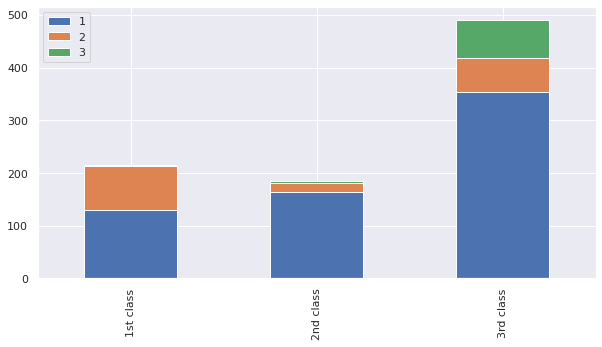

In [70]:
Pclass1 = train_df[train_df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_df[train_df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_df[train_df['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

### 객실등급 : 탑승위치
1등석의 50% 이상이 S embark 출신  
2등석의 50% 이상이 S embark 출신  
3등급의 50% 이상이 S embark 출신  

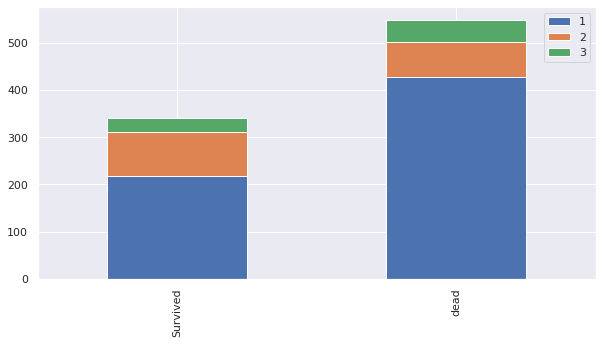

In [71]:
bar_chart('Embarked')

### 탑승위치 : 생존여부
'S' : 1, 'C' : 2, 'Q' : 3
- 생존측면: 
- 사망측면:

### 4.6 요금

In [72]:
test_df['Fare'].isnull().sum()

1

In [73]:
train_df['Fare'].fillna(train_df.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [74]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Age_cut          0
dtype: int64

In [75]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.397497,0.523008,0.381594,32.204208,1.361392,2.615039
std,257.353842,0.486592,0.836071,0.477990,13.263570,1.102743,0.806057,49.693429,0.635673,1.683014
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,1.000000,4.000000
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000,4.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,4.000000


In [76]:
train_df.describe(include='O')

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Braund, Mr. Owen Harris",347082,B96 B98
freq,1,7,4


In [77]:
# fill missing Fare with median fare for each Pclass
# 누락된 운임을 각 Pclass의 중간 운임으로 채우십시오.

# train_df['Fare'].fillna(train_df.groupby('Pclass')['Fare'].transform('median'), inplace=True) # train_df 결측치 없음
test_df['Fare'].fillna(test_df.groupby('Pclass')['Fare'].transform('median'), inplace=True) # test_df 결측치 있음

In [78]:
# fill missing Fare with median fare for each Pclass
# 누락된 운임을 각 Pclass의 중간 운임으로 채우십시오.
train_df['Fare_qcut'] = pd.qcut(train_df.Fare, q=5, labels=[0,1,2,3,4])
test_df['Fare_qcut'] = pd.qcut(test_df.Fare, q=5, labels=[0,1,2,3,4])

In [79]:
# 테이블로 확인을 해보니 구간을 수치로 직접 지정해서 나눈 것보다 각 범주값의 갯수들이 비슷비슷해졌다. (완전 동일한 갯수로 나누어지지는 않음 주의)
# 각의 범주 그룹을 비슷비슷한 크기로 범주화시키고 싶다면 qcut을 사용하는 것이 적당하다.
train_df.Fare_qcut.value_counts().to_frame().style.background_gradient(cmap='summer')

,Fare_qcut
1,184
3,180
0,179
4,176
2,172


In [80]:
dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Age_cut          0
Fare_qcut        0
dtype: int64

In [81]:
train_df['Fare'].max()

512.3292

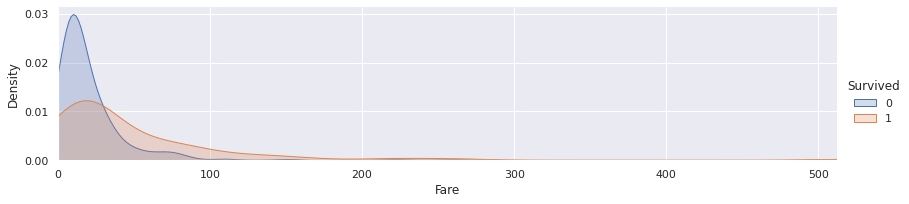

In [82]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare', shade= True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()

plt.show() # 전체

(0.0, 20.0)

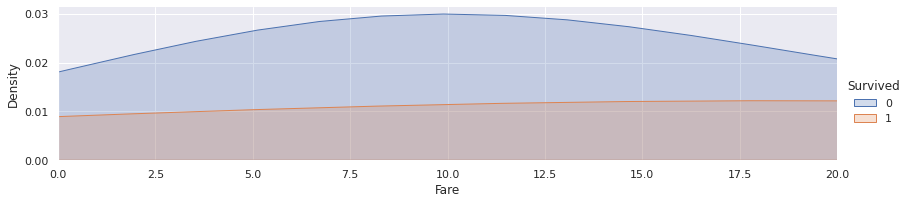

In [83]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare', shade= True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 30.0)

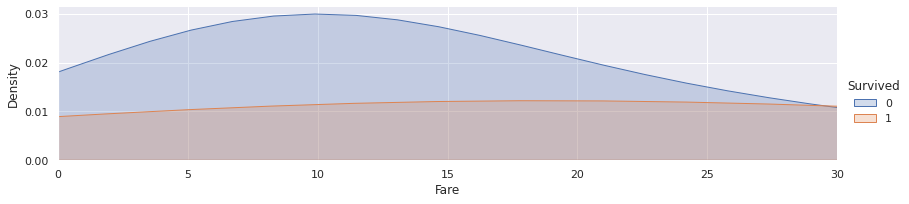

In [84]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare', shade= True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0.0, 512.3292)

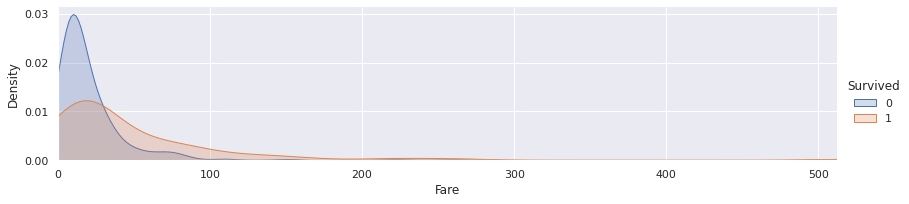

In [85]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare', shade= True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
plt.xlim(0) # 0에서 max까지

### 4.7 객실번호

In [86]:
# train_df = train_df['Cabin'].drop(columns=['Cabin'], axis=1)
# test_df = test_df['Cabin'].drop(columns=['Cabin'], axis=1)

In [87]:
train_df['Cabin'].isnull().sum()

687

In [88]:
train_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [89]:
train_df['Cabin'].isnull().sum()

687

In [90]:
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

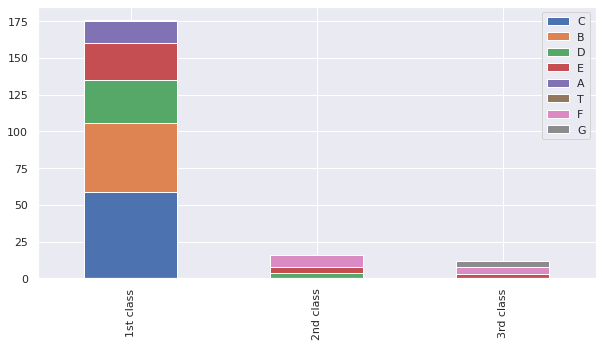

In [91]:
Pclass1 = train_df[train_df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_df[train_df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_df[train_df['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [92]:
Cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].map(Cabin_mapping)

In [93]:
# fill missing Fare with median fare for each Pclass
# 누락된 운임을 각 Pclass의 중간 운임으로 채우십시오.
train_df['Cabin'].fillna(train_df.groupby('Pclass')['Cabin'].transform("median"), inplace=True)
test_df['Cabin'].fillna(test_df.groupby('Pclass')['Cabin'].transform("median"), inplace=True)

In [94]:
train_df['Cabin'].isnull().sum()

0

In [95]:
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cut,Fare_qcut
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2.0,3,4.0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,2.0,1,0.0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2.0,3,4.0,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,2.0,1,4.0,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,2.0,1,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.0,0,0,A.5. 3236,8.0500,2.0,1,4.0,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,0.8,2,0.0,2,4
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2.0,1,4.0,2,0
416,1308,3,"Ware, Mr. Frederick",0,36.0,0,0,359309,8.0500,2.0,1,4.0,2,1


### 4.8 FamilySize

In [96]:
train_df["FamilySize"] = train_df['SibSp'] + train_df['Parch'] + 1
test_df["FamilySize"] = test_df['SibSp'] + test_df['Parch'] + 1

(0.0, 11.0)

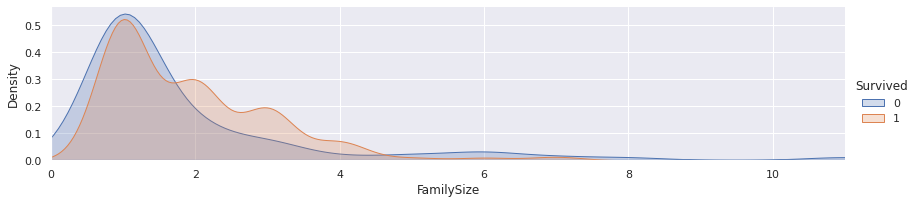

In [97]:
facet = sns.FacetGrid(train_df, hue='Survived' ,aspect=4)
facet.map(sns.kdeplot,'FamilySize', shade= True)
facet.set(xlim=(0, train_df['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [98]:
family_mapping = {1 : 0, 2 : 0.4, 3 : 0.8, 4 : 1.2, 5 : 1.6, 6 : 2, 7 : 2.4, 8 : 2.8, 9 : 3.2, 10 : 3.6, 11 : 4}
for dataset in combine:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [99]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cut,Fare_qcut,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0,1,4.0,1,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.8,2,0.0,2,4,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,1,1.0,1,1,0.0


In [100]:
features_drop = ['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']
train_df = train_df.drop(features_drop, axis=1)
test_df = test_df.drop(features_drop, axis=1)

In [101]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [102]:
target = train_df['Survived']
train_df.shape, target.shape

((891, 9), (891,))

In [103]:
test_df.head(3)

,PassengerId,Pclass,Sex,Cabin,Embarked,Title,Age_cut,Fare_qcut,FamilySize
0,892,3,0,2.0,3,4.0,1,1,0.0
1,893,3,1,2.0,1,0.0,2,0,0.4
2,894,2,0,2.0,3,4.0,1,1,0.0


In [104]:
train_df.shape

(891, 9)

In [105]:
test_df.shape

(418, 9)

In [106]:
train_df.rename(columns={'Age_cut' : 'Age'}, inplace=True)
train_df.rename(columns={'Fare_qcut' : 'Fare'}, inplace=True)
train_df

,Survived,Pclass,Sex,Cabin,Embarked,Title,Age,Fare,FamilySize
0,0,3,0,2.0,1,4.0,1,0,0.4
1,1,1,1,0.8,2,0.0,2,4,0.4
2,1,3,1,2.0,1,1.0,1,1,0.0
3,1,1,1,0.8,1,0.0,2,4,0.4
4,0,3,0,2.0,1,4.0,2,1,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.8,1,0.0,1,2,0.0
887,1,1,1,0.4,1,1.0,1,3,0.0
888,0,3,1,2.0,1,1.0,1,3,1.2
889,1,1,0,0.8,2,4.0,1,3,0.0


In [107]:
test_df.rename(columns={'Age_cut' : 'Age'}, inplace=True)
test_df.rename(columns={'Fare_qcut' : 'Fare'}, inplace=True)
test_df

,PassengerId,Pclass,Sex,Cabin,Embarked,Title,Age,Fare,FamilySize
0,892,3,0,2.0,3,4.0,1,1,0.0
1,893,3,1,2.0,1,0.0,2,0,0.4
2,894,2,0,2.0,3,4.0,1,1,0.0
3,895,3,0,2.0,1,4.0,2,1,0.0
4,896,3,1,2.0,1,0.0,2,2,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,1,4.0,1,1,0.0
414,1306,1,1,0.8,2,0.0,2,4,0.0
415,1307,3,0,2.0,1,4.0,2,0,0.0
416,1308,3,0,2.0,1,4.0,2,1,0.0


### 5. 모델링

In [108]:
# Importing Classifier Modules
# 분류자 모델 분류하기

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [109]:
train_df

,Survived,Pclass,Sex,Cabin,Embarked,Title,Age,Fare,FamilySize
0,0,3,0,2.0,1,4.0,1,0,0.4
1,1,1,1,0.8,2,0.0,2,4,0.4
2,1,3,1,2.0,1,1.0,1,1,0.0
3,1,1,1,0.8,1,0.0,2,4,0.4
4,0,3,0,2.0,1,4.0,2,1,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.8,1,0.0,1,2,0.0
887,1,1,1,0.4,1,1.0,1,3,0.0
888,0,3,1,2.0,1,1.0,1,3,1.2
889,1,1,0,0.8,2,4.0,1,3,0.0


In [110]:
test_df

,PassengerId,Pclass,Sex,Cabin,Embarked,Title,Age,Fare,FamilySize
0,892,3,0,2.0,3,4.0,1,1,0.0
1,893,3,1,2.0,1,0.0,2,0,0.4
2,894,2,0,2.0,3,4.0,1,1,0.0
3,895,3,0,2.0,1,4.0,2,1,0.0
4,896,3,1,2.0,1,0.0,2,2,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,1,4.0,1,1,0.0
414,1306,1,1,0.8,2,0.0,2,4,0.0
415,1307,3,0,2.0,1,4.0,2,0,0.0
416,1308,3,0,2.0,1,4.0,2,1,0.0


In [111]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    int64   
 3   Cabin       891 non-null    float64 
 4   Embarked    891 non-null    int64   
 5   Title       891 non-null    float64 
 6   Age         891 non-null    category
 7   Fare        891 non-null    category
 8   FamilySize  891 non-null    float64 
dtypes: category(2), float64(3), int64(4)
memory usage: 51.0 KB


In [112]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Cabin        418 non-null    float64 
 4   Embarked     418 non-null    int64   
 5   Title        418 non-null    float64 
 6   Age          418 non-null    category
 7   Fare         418 non-null    category
 8   FamilySize   418 non-null    float64 
dtypes: category(2), float64(3), int64(4)
memory usage: 24.2 KB


### 데이터 준비

In [113]:
# 목적 변수 제거
X_train = train_df.drop("Survived", axis=1)
#목적 변수 역할
Y_train = train_df["Survived"]
#예측 대상 데이터 셋
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [114]:
train_df

,Survived,Pclass,Sex,Cabin,Embarked,Title,Age,Fare,FamilySize
0,0,3,0,2.0,1,4.0,1,0,0.4
1,1,1,1,0.8,2,0.0,2,4,0.4
2,1,3,1,2.0,1,1.0,1,1,0.0
3,1,1,1,0.8,1,0.0,2,4,0.4
4,0,3,0,2.0,1,4.0,2,1,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.8,1,0.0,1,2,0.0
887,1,1,1,0.4,1,1.0,1,3,0.0
888,0,3,1,2.0,1,1.0,1,3,1.2
889,1,1,0,0.8,2,4.0,1,3,0.0


In [115]:
test_df

,PassengerId,Pclass,Sex,Cabin,Embarked,Title,Age,Fare,FamilySize
0,892,3,0,2.0,3,4.0,1,1,0.0
1,893,3,1,2.0,1,0.0,2,0,0.4
2,894,2,0,2.0,3,4.0,1,1,0.0
3,895,3,0,2.0,1,4.0,2,1,0.0
4,896,3,1,2.0,1,0.0,2,2,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,1,4.0,1,1,0.0
414,1306,1,1,0.8,2,0.0,2,4,0.0
415,1307,3,0,2.0,1,4.0,2,0,0.0
416,1308,3,0,2.0,1,4.0,2,1,0.0


### 6.2 Cross Validation 교차검증(K-fold)

### 6.2.1 kNN

In [116]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.76

### 6. 테스트